In [1]:
#importing necessary libraries and packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris

In [2]:
data=pd.read_csv('/Users/prayashdas/Downloads/HW3/Titanic.csv')
data.head()
#data.info()
#data=pd.get_dummies(data,columns=['sex'])
#df=pd.DataFrame(data)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
columnsdel=['name','parch','ticket','fare','cabin','embarked','boat','body','home.dest'] #deleting irrelevant columns
data=data.drop(columns=columnsdel,axis=1)
data

,Unnamed: 0,pclass,survived,sex,age,sibsp
0,1,1st,1,female,29.0000,0
1,2,1st,1,male,0.9167,1
2,3,1st,0,female,2.0000,1
3,4,1st,0,male,30.0000,1
4,5,1st,0,female,25.0000,1
...,...,...,...,...,...,...
1304,1305,3rd,0,female,14.5000,1
1305,1306,3rd,0,female,NaN,1
1306,1307,3rd,0,male,26.5000,0
1307,1308,3rd,0,male,27.0000,0


In [4]:
data['sex'] = data['sex'].map({'female':0 , 'male': 1}) #mapping the sex column to a dictionary and converting it to integer
data
data['pclass'] = data['pclass'].map({'1st':1 , '2nd': 2, '3rd': 3})

In [5]:
x=data.loc[:,['pclass','sex','age','sibsp']]
x
y= data.loc[:,'survived'] #Designing the design matrix and the feature matrix as x and y respectively
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [6]:
#label_encoder=LabelEncoder()
#data['sex_encoded']=label_encoder.fit_transform(data[sex])


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [8]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
fig=plt.figure(figsize=(100,100))
print(x_train.columns.values)
mylist=['plcass','sex','age','sibsp']
tree.plot_tree(clf, feature_names=mylist, class_names=['not survived', 'survived']) #Full Tree
plt.show()

['pclass' 'sex' 'age' 'sibsp']


In [10]:
export_graphviz(clf, out_file= "tree.dot", feature_names=x_train.columns.tolist(),class_names = ['0','1'])


In [11]:
ypred=clf.predict(x_test)

In [12]:

train_pred = clf.predict(x_train)
print("test accuracy", accuracy_score(y_test,ypred))
print("train accuracy", accuracy_score(y_train,train_pred))

test accuracy 0.7455470737913485
train accuracy 0.8449781659388647


In [13]:
tree_sizes=np.arange(2,30)
param_grid={'max_depth': tree_sizes} #Using GridsearchCV() to find the best parameter


In [14]:
grid=GridSearchCV(clf,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy')

In [15]:
grid.best_params_
grid.cv_results_

{'mean_fit_time': array([0.00273175, 0.00275593, 0.00266819, 0.00350356, 0.00317531,
        0.00420222, 0.0039288 , 0.00388541, 0.00309196, 0.0032815 ,
        0.00305037, 0.00317917, 0.00317702, 0.00308461, 0.00308952,
        0.00314531, 0.00329571, 0.00326223, 0.00377111, 0.00334826,
        0.00299315, 0.00295005, 0.00302224, 0.00302982, 0.00297427,
        0.00298328, 0.00312481, 0.00291715]),
 'std_fit_time': array([2.01264791e-04, 7.62227441e-05, 5.36057865e-05, 7.24275885e-04,
        2.85082884e-04, 1.16530413e-03, 4.79563231e-04, 6.94794424e-04,
        1.85354559e-04, 3.13845096e-04, 1.97950744e-04, 1.86548947e-04,
        1.55633513e-04, 3.18868798e-04, 3.34505824e-04, 2.88504434e-04,
        4.75537231e-04, 2.51850807e-04, 1.18071926e-03, 3.95783246e-04,
        7.12699136e-05, 8.69961397e-05, 1.67139920e-04, 7.98119147e-05,
        7.45150179e-05, 5.43377649e-05, 2.69799529e-04, 1.68520121e-04]),
 'mean_score_time': array([0.00207071, 0.00207767, 0.00193706, 0.00248661, 

Text(0.5, 1.0, 'Tree Size vs Misclassification rate')

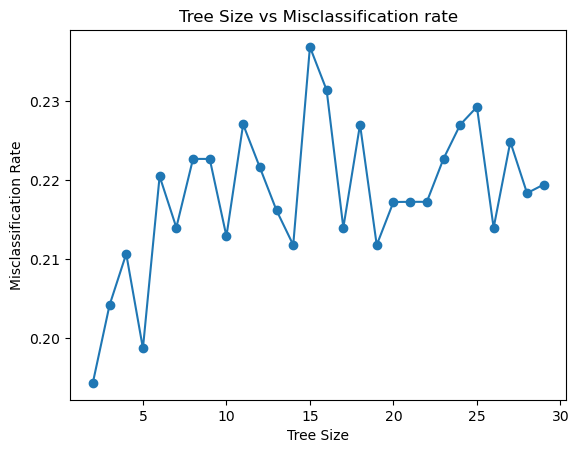

In [16]:
misclassification=1-grid.cv_results_['mean_test_score']
plt.plot(tree_sizes,misclassification, marker='o', linestyle = '-')
plt.xlabel("Tree Size")
plt.ylabel("Misclassification Rate")
plt.title("Tree Size vs Misclassification rate") #plotting the graph 

In [17]:
best_para = grid.best_params_['max_depth']

print("Pruned tree : ",best_para, "depth")

Pruned tree :  2 depth


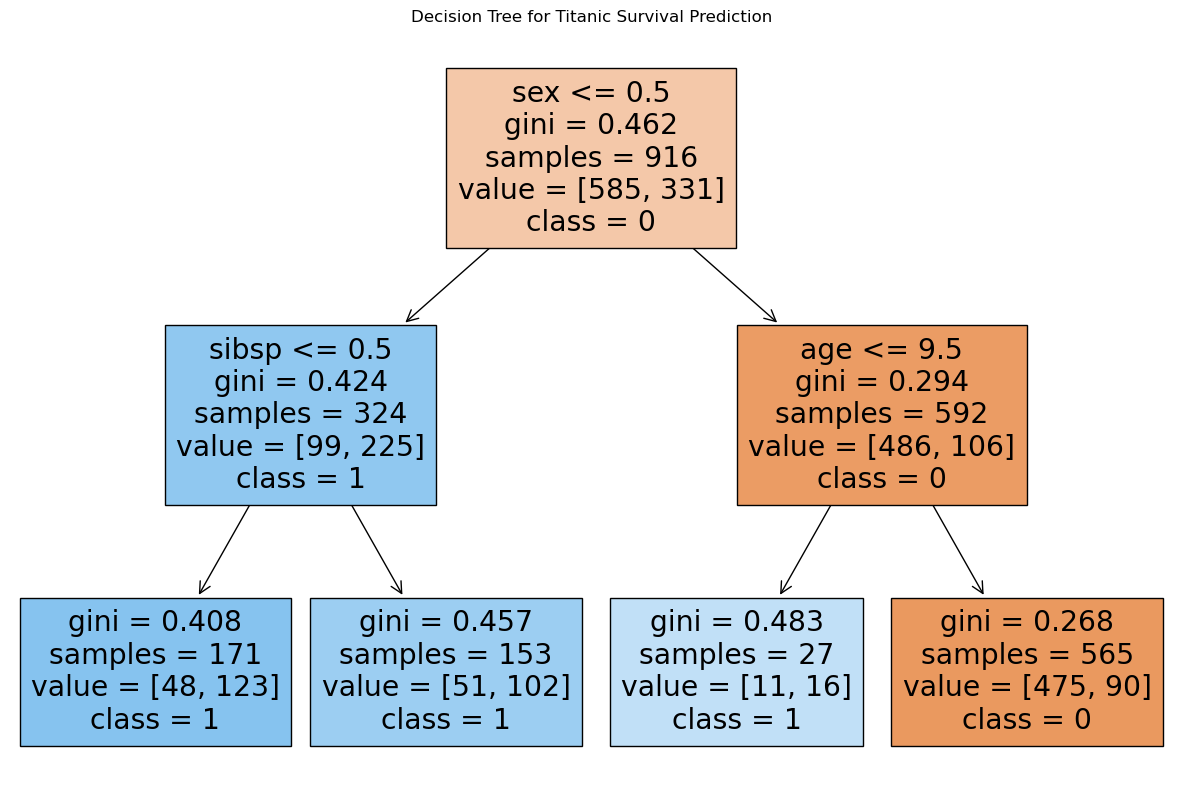

In [18]:
pruned_tree = DecisionTreeClassifier(max_depth=best_para)

pruned_tree.fit(x_train,y_train)

plt.figure(figsize=(15, 10))
plot_tree(pruned_tree, filled=True, feature_names = x_train.columns.tolist(), class_names = ['0','1'])
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show() #Plotting of Pruned Tree

In [19]:
pruned_train_pred = pruned_tree.predict(x_train)
pruned_test_pred = pruned_tree.predict(x_test)

print("test accuracy", accuracy_score(y_test,pruned_test_pred))
print("train accuracy", accuracy_score(y_train,pruned_train_pred)) #accuracy rate of training and testing data 

test accuracy 0.7938931297709924
train accuracy 0.7816593886462883


In [20]:
conf_matrix_train = metrics.confusion_matrix(y_train,pruned_train_pred)
conf_matrix_test = metrics.confusion_matrix(y_test,pruned_test_pred)
conf_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_train, display_labels = ['0', '1'])
conf_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_test, display_labels = ['0', '1'])

In [21]:
survived = (conf_matrix_test[1][1]/(conf_matrix_test[1][1] + conf_matrix_test[1][0]))*100
fatalities = (conf_matrix_test[0][0]/(conf_matrix_test[0][0] + conf_matrix_test[0][1]))*100

In [22]:
print("percent survivors correctly predicted (on test data) :",survived,"%")
print("percent fatalities correctly predicted (on test data) :",fatalities,"%")

percent survivors correctly predicted (on test data) : 72.7810650887574 %
percent fatalities correctly predicted (on test data) : 84.375 %


In [23]:
x_train['age'].fillna(0,inplace = True) #Implementing Random Forest Classifier() for training a randomforest
x_test['age'].fillna(0 ,inplace= True)

rforest = RandomForestClassifier(n_estimators=50,max_depth=best_para)
rforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=50)

In [24]:
ypred_test = rforest.predict(x_test)
ypred_train = rforest.predict(x_train)
print("Testing accuracy :",accuracy_score(y_test,ypred_test))
print("Training accuracy :", accuracy_score(y_train,ypred_train))

Testing accuracy : 0.7709923664122137
Training accuracy : 0.7849344978165939


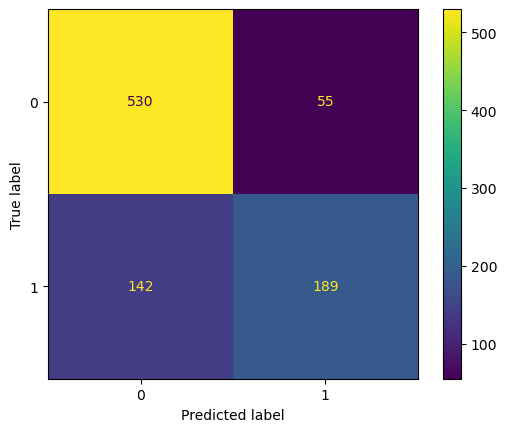

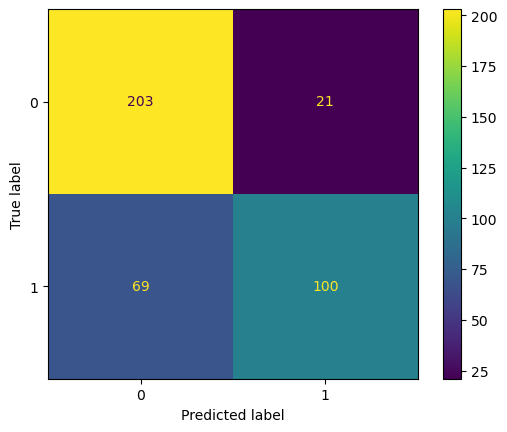

In [25]:
conf_matrix_train = metrics.confusion_matrix(y_train, ypred_train)
conf_matrix_test = metrics.confusion_matrix(y_test, ypred_test)
conf_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_train, display_labels = ['0', '1'])
conf_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_test, display_labels = ['0', '1'])

conf_display_train.plot()
conf_display_test.plot()


plt.show()
plt.show()

In [26]:
print('The lack of significant improvement in accuracy between a single Decision Tree and a Random Forest could be attributed to the inherent characteristics of the dataset. It appears that the data might require detailed feature engineering. By creating more relevant features, removing noise, and considering interactions between variables, the model can learn more complex patterns, making it easier for the Random Forest to discern meaningful distinctions within the data. Without these refined features, it will be difficult for both the single Decision Tree and the Random Forest to capture the underlying patterns effectively.')


The lack of significant improvement in accuracy between a single Decision Tree and a Random Forest could be attributed to the inherent characteristics of the dataset. It appears that the data might require detailed feature engineering. By creating more relevant features, removing noise, and considering interactions between variables, the model can learn more complex patterns, making it easier for the Random Forest to discern meaningful distinctions within the data. Without these refined features, it will be difficult for both the single Decision Tree and the Random Forest to capture the underlying patterns effectively.
